In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel('house_dataset_baku.xlsx', usecols=['area', 'price'])

data.head(5)

,price,area
0,137 000,52 m²
1,183 000,102 m²
2,145 000,65 m²
3,190 000,95 m²
4,294 000,190 m²


# 1. Converting Area and Price Features to Numeric and selecting only 500 rows from our dataset

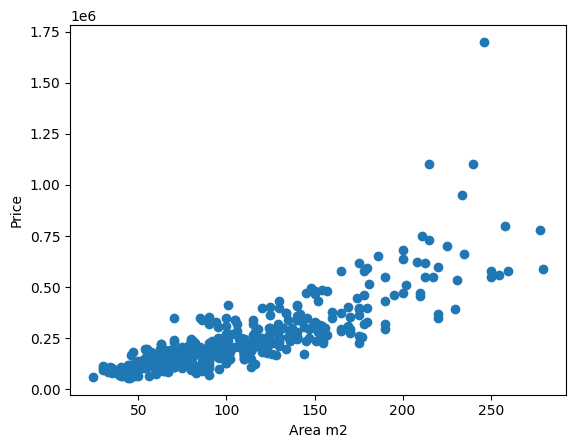

In [8]:
data['area'] = data['area'].str.replace('m²', '', regex=False).str.replace(' ', '').str.split('.').str[0].astype(int) #Cleaned numeric columns
data['price'] = data['price'].str.replace(' ', '').astype(int)

new_data = data.head(500)
area = new_data['area']
price = new_data['price']

plt.scatter(area, price)
plt.xlabel('Area m2')
plt.ylabel('Price')
plt.show()

In [9]:
new_data = new_data[new_data['price'] <= 1000000]  # keeps only rows with price <= 1,000,000
new_data = new_data.reset_index(drop=True)

# Visualizing the linearity between area and price feature

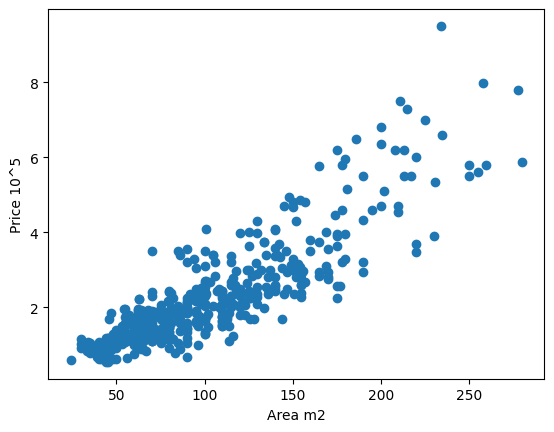

In [10]:
area = new_data['area']
price = new_data['price']/100000
plt.scatter(area, price)
plt.xlabel('Area m2')
plt.ylabel('Price 10^5')
plt.show()

# Creating gradient_descent algorithm function

In [11]:
def gradient_descent(m, b, points, alpha):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].area
        y = points.iloc[i].price/100000
        
        m_gradient += -(2/n)*x*(y-(m*x+b))
        b_gradient += -(2/n)*(y-(m*x+b))

    m_final = m - m_gradient*alpha
    b_final = b - b_gradient*alpha
    
    return m_final, b_final


# Applying parameters to the algorithm, and plotting the slope through the data points

0.005666058442655938 4.489831790744469e-05
0.022648927198954078 0.00010910080352170165
0.02264951109121532 3.658691396879304e-05
0.02265009476276145 -3.5899565517980375e-05
0.022650678213681223 -0.00010835864529951136
0.022651261444058025 -0.0001807903357328189
0.022651844453975226 -0.00025319464717100704
0.022652427243516158 -0.0003255715899632669
0.02265300981276412 -0.0003979211744548765
0.022653592161802388 -0.0004702434109872047
0.022654168470514432 -0.0005418154961959001


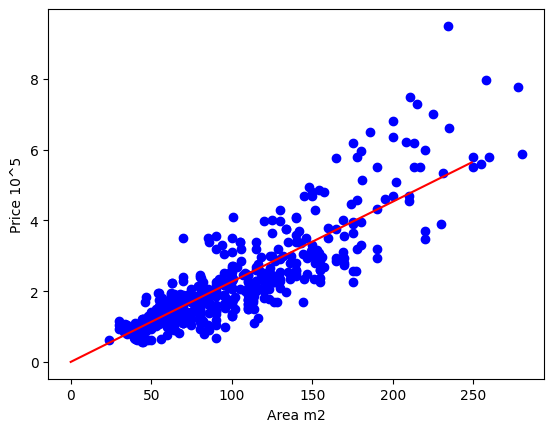

In [12]:
m = 0
b = 0
alpha = 0.00001
epochs = 1000

plt.scatter(area, price, color='blue')


for i in range(epochs):
    m, b = gradient_descent(m, b, new_data, alpha)
    if i % 100 == 0:
        print(m, b)
        
print(m, b)
plt.plot(list(range(0, 250)), [m*x+b for x in range(0, 250)], color = 'red')
plt.xlabel('Area m2')
plt.ylabel('Price 10^5')
plt.show()

# Calculating the R2 metric score value

In [ ]:
def r2_score_gradient_descent(x, y, m, b):
    y_pred = m*x+b

    # Residual sum of squares
    ss_res = np.sum((y-y_pred)**2)

    # Total sum of squares
    ss_total = np.sum((y - np.mean(y))**2)

    return 1 - (ss_res/ss_total)

r2 = r2_score_gradient_descent(area, price, m, b)
print('R2 score: ', r2)